In [1]:
import pandas as pd
import numpy as np


In [7]:
train = pd.read_csv('mnist_train.csv', header=None)
labels = train.iloc[:, 0]
images = train.iloc[:, 1:]

test = pd.read_csv('mnist_train.csv', header=None)
test_labels = test.iloc[:, 0]
test_images = test.iloc[:, 1:]

#convert from python list into numpy array i.e. 60k to 1 array with each column a 28x28 matrix
#label = label.astype(np.uint8)
#images = np.array(images).reshape((-1, 1, 28, 28)).astype(np.uint8)

## PCA

In [3]:
from sklearn.decomposition import PCA

COMPONENT_NUM = 35
pca = PCA(n_components=COMPONENT_NUM, whiten=True)
pca.fit(images)
imagesPCA = pca.transform(images)


array([ 0.09704664,  0.16800588,  0.22969677,  0.28359097,  0.33227894,
        0.37540125,  0.40812055,  0.4369595 ,  0.4645798 ,  0.4881498 ,
        0.5092417 ,  0.52947161,  0.54662979,  0.56355091,  0.57933732,
        0.59416685,  0.60741245,  0.62018143,  0.63205406,  0.64358089,
        0.65424255,  0.66430968,  0.67384537,  0.6829708 ,  0.69180481,
        0.70019796,  0.70832356,  0.71618718,  0.72363449,  0.73054292,
        0.73712233,  0.74360186,  0.74962547,  0.75547611,  0.76117295])

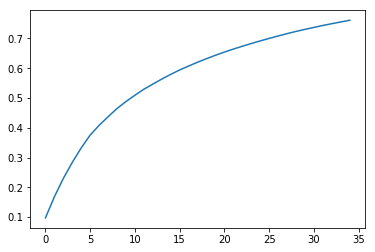

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

var_explained = pca.explained_variance_ratio_.cumsum()
plt.plot(var_explained)
var_explained

In [5]:
imagesPCA.shape

(60000, 35)

In [6]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(imagesPCA, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
test_imagesPCA = pca.transform(test_images)
test_predict = svc.predict(test_imagesPCA)

In [12]:
test_predict.shape

(60000,)

In [14]:
from sklearn import  metrics
from sklearn.metrics import accuracy_score
#accuracy and confusion matrix

print("Classification report for classifier %s:\n%s\n"
      % (svc, metrics.classification_report(test_labels, test_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_labels, test_predict))

accuracy_score(test_labels, test_predict)

0.99229999999999996